**SURYA.K**

# TASK 3 :CAR PRICE PREDICTION USING MACHINE LEARNING

# PROBLEM STATEMENT : The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

# Importing  Libraries


•Importing required libraries that are pandas NumPy and matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [ ]:
df=pd.read_csv("E:\OASIS INFOBYTE\TASK3.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


• Loaded dataset and stored data as variable df

• Dropping Car_ID column

In [ ]:
df.drop('car_ID', axis=1, inplace=True)

In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


• df.head () so this will give us the initial 5 rows and similarly df.tail()

In [ ]:
df.shape

(205, 25)

• To find the total count of no of rows and columns we use df.shape,so u can see there are 205 rows and 25 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

• df.info() will give all the information of our dataset

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.size

5125

In [ ]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

• To check if our dataset contain any null value or missing value we can use the code df.isnull().sum()

In [ ]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Finding the maximum price of the car

In [ ]:
df['price'].max()

45400.0

In [ ]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

# Finding the most expensive car 

In [ ]:
df[['CarName','price']][df.price==df.price.max()]

,CarName,price
74,buick regal sport coupe (turbo),45400.0


# DATA VISUALIZATION

C:\Users\NANDHINI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

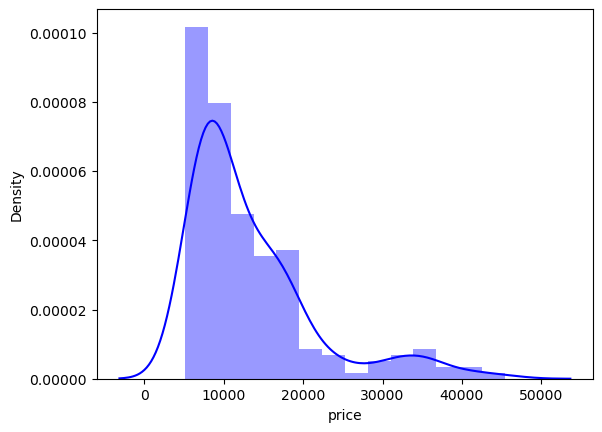

In [ ]:
sns.distplot(df['price'],color ='blue')

Text(0.5, 1.0, 'FUEL TYPE')

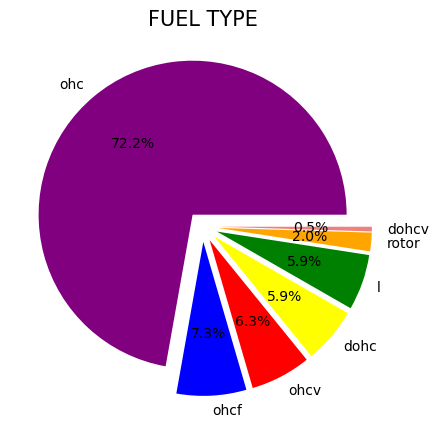

In [ ]:
#Pie Chart
labels=df['enginetype'].value_counts().index #unique region names
size=df['enginetype'].value_counts().values
colors=['purple','blue','red','yellow','green','orange','lightcoral']
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(5,5))
plt.pie(size,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('FUEL TYPE',fontsize=15)

Text(0.5, 1.0, 'FUEL TYPE')

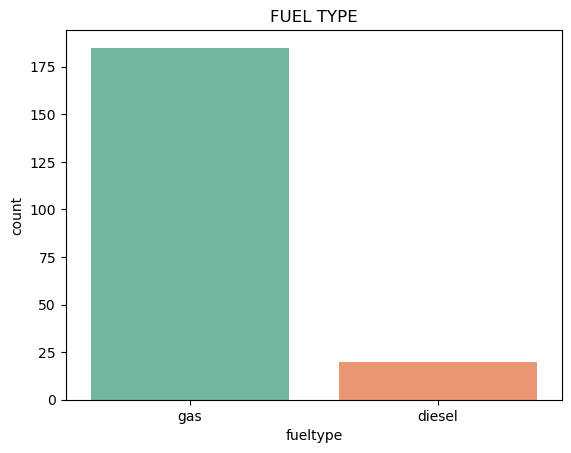

In [ ]:
sns.countplot(x=df["fueltype"],palette = "Set2").set_title("FUEL TYPE")

<AxesSubplot:xlabel='doornumber', ylabel='price'>

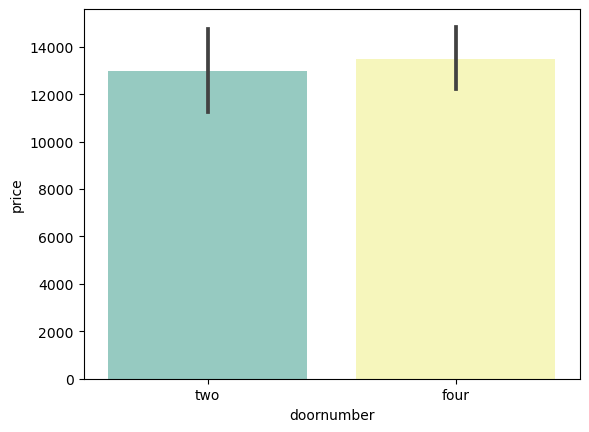

In [ ]:
sns.barplot(x = df['doornumber'], y = df['price'],palette = "Set3")

<AxesSubplot:>

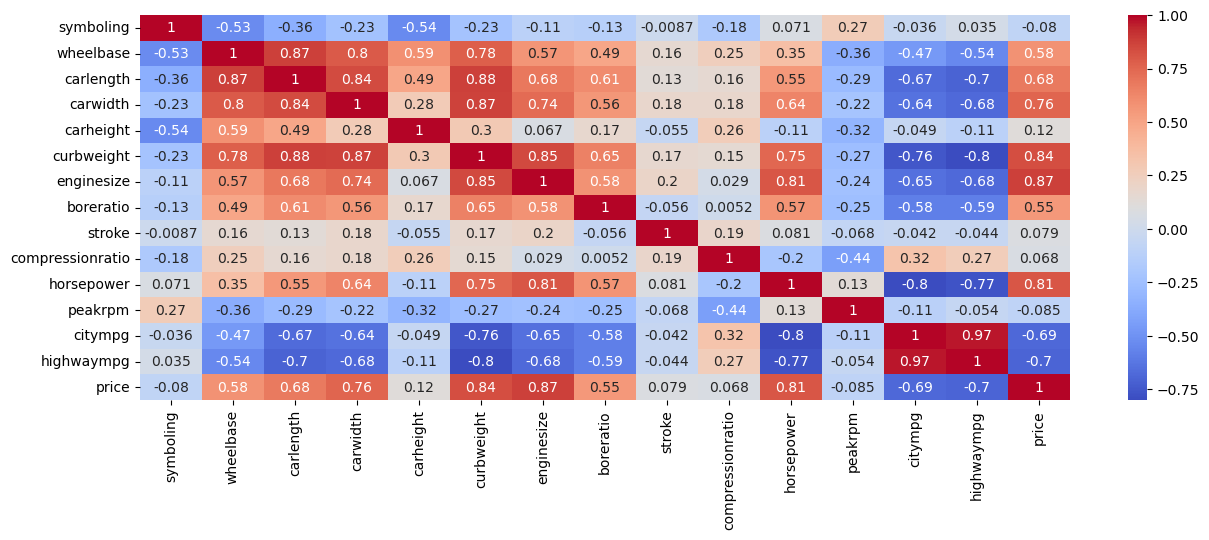

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

# BUILDING A MODEL

In [ ]:
df1 = df[["symboling", "wheelbase", "carlength",
"carwidth", "carheight", "curbweight",
"enginesize", "boreratio", "stroke",
"compressionratio", "horsepower", "peakrpm",
"citympg", "highwaympg", "price"]]

In [ ]:
x = df1.drop('price', axis=1)
y = df1['price']

Splitting data into test and train

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape

(164, 14)

In [ ]:
x_test.shape

(41, 14)

# USING LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Testing data

In [ ]:
print(x_test)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
112          0      107.9      186.7      68.4       56.7        3252   
160          0       95.7      166.3      64.4       53.0        2094   
116          0      107.9      186.7      68.4       56.7        3252   
201         -1      109.1      188.8      68.8       55.5        3049   
164          1       94.5      168.7      64.0       52.6        2204   
9            0       99.5      178.2      67.9       52.0        3053   
189          3       94.5      159.3      64.2       55.6        2254   
13           0      101.2      176.8      64.8       54.3        2765   
65           0      104.9      175.0      66.1       54.4        2670   
126          3       89.5      168.9      65.0       51.6        2756   
38           0       96.5      167.5      65.2       53.3        2289   
192          0      100.4      180.2      66.9       55.1        2579   
176         -1      102.4      175.6      66.5     

# Model prediction

In [ ]:
y_pred = lr.predict(x_test) 

In [ ]:
from sklearn import metrics
lr.score(x_test,y_test)

0.8075204921958669

In [ ]:
print("ACCURACY IS :",lr.score(x_test,y_test)*100 )

ACCURACY IS : 80.75204921958668


In [ ]:
df = pd.DataFrame({'Actual Price': y_test,'Predicted Price': y_pred})  
df.head()

,Actual Price,Predicted Price
112,16900.0,17863.907799
160,7738.0,5490.535120
116,17950.0,17863.907799
201,19045.0,18939.621758
164,8238.0,6287.992035


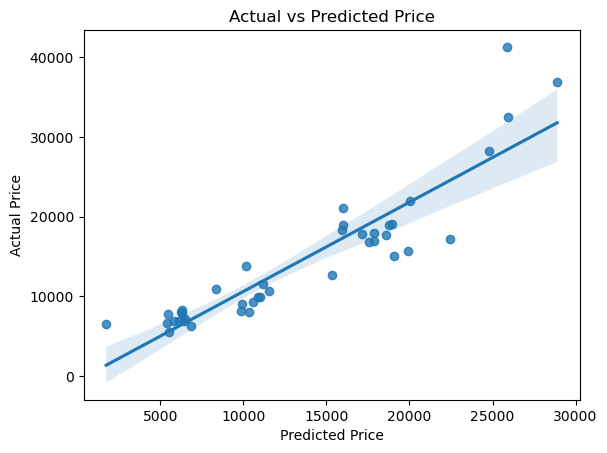

In [ ]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

# USING DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

# Testing data

In [ ]:
print(x_test)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
112          0      107.9      186.7      68.4       56.7        3252   
160          0       95.7      166.3      64.4       53.0        2094   
116          0      107.9      186.7      68.4       56.7        3252   
201         -1      109.1      188.8      68.8       55.5        3049   
164          1       94.5      168.7      64.0       52.6        2204   
9            0       99.5      178.2      67.9       52.0        3053   
189          3       94.5      159.3      64.2       55.6        2254   
13           0      101.2      176.8      64.8       54.3        2765   
65           0      104.9      175.0      66.1       54.4        2670   
126          3       89.5      168.9      65.0       51.6        2756   
38           0       96.5      167.5      65.2       53.3        2289   
192          0      100.4      180.2      66.9       55.1        2579   
176         -1      102.4      175.6      66.5     

# Model prediction

In [ ]:
y_prediction = dt.predict(x_test) 

In [ ]:
from sklearn import metrics
dt.score(x_test,y_test)

0.8787894228091618

In [ ]:
print("ACCURACY IS :",dt.score(x_test,y_test)*100 )

ACCURACY IS : 87.87894228091618


In [ ]:
df = pd.DataFrame({'Actual Price': y_test,'Predicted Price': y_prediction})  
df.head()

,Actual Price,Predicted Price
112,16900.0,13200.0
160,7738.0,7129.0
116,17950.0,13200.0
201,19045.0,22625.0
164,8238.0,9258.0


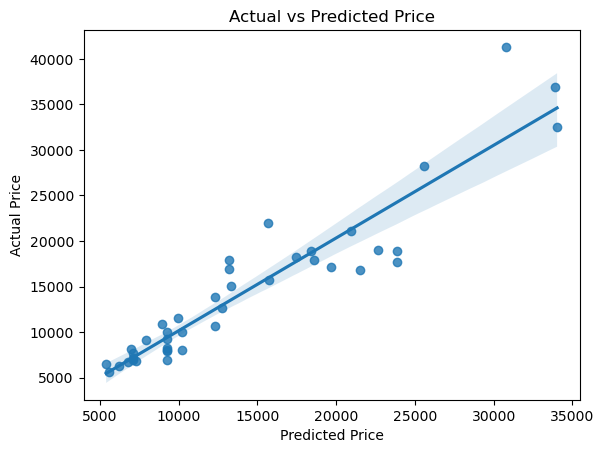

In [ ]:
sns.regplot(x=y_prediction, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

# Comparison of Algorithms

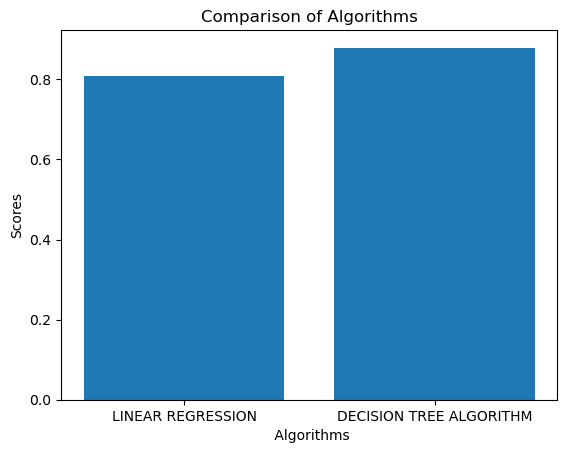

In [ ]:
x=['LINEAR REGRESSION', 'DECISION TREE ALGORITHM']
y = [lr.score(x_test,y_test),dt.score(x_test,y_test)]

plt.bar(x,y)
plt.xlabel(' Algorithms')
plt.ylabel("Scores")
plt.title('Comparison of Algorithms')
plt.show()

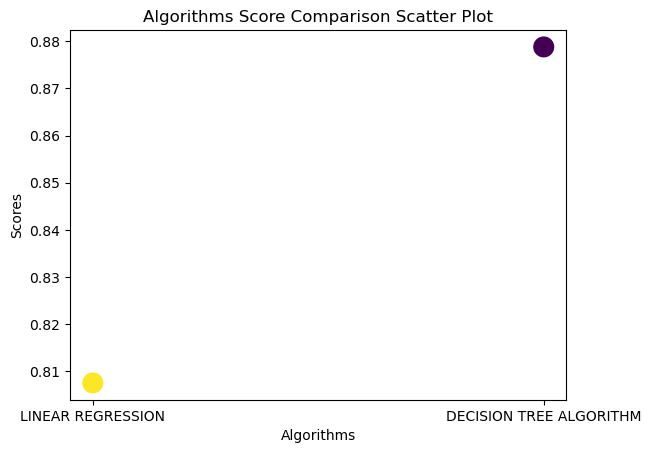

In [ ]:
# Scatter Plot
colors = np.random.rand(2)
plt.xlabel('Algorithms')
plt.ylabel("Scores")
plt.title('Algorithms Score Comparison Scatter Plot')
plt.scatter(x, y, s=200, c=colors)
plt.show()

# Prediction of new unknown data using Linear Regression

In [ ]:
pm = [2,93.1,159.1,64.2,54.1,1900,91,3.03,3.150,9.0,68,5000,31,38]
prediction= lr.predict([pm])
print("price = {}".format(round(prediction[0],3)))

price = 6431.608


C:\Users\NANDHINI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Prediction of new unknown data using DecisionTreeRegressor

In [ ]:
pm = [2,93.1,159.1,64.2,54.1,1900,91,3.03,3.150,9.0,68,5000,31,38]
prediction= dt.predict([pm])
print("price = {}".format(round(prediction[0],3)))

price = 6095.0


C:\Users\NANDHINI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**INTERPRETATION**

By Taking The Predicted Accuracies into Considerations ,We Concluded that

• Linear Regression Which Shown **71% Accuracy rate** respectively.

• DecisionTreeRegressor is model Which Shown **80% Accuracy rate** respectively.